# Dự án 1: Phân tích và Dự đoán Sự hài lòng của Hành khách

## Bước 1: Tải và Khám phá Dữ liệu (EDA)
Mục tiêu của bước này là tải dữ liệu, hiểu cấu trúc, xác định các vấn đề (như dữ liệu thiếu) và phân tích biến mục tiêu. Đầu tiên, chúng ta sẽ nhập các thư viện cần thiết.

In [1]:
import pandas as pd

# Cài đặt để các biểu đồ hiển thị ngay trong notebook
%matplotlib inline

In [2]:
try:
    df = pd.read_csv('airline_satisfaction.csv')
    print("Tải file thành công!")

    # Hiển thị 5 dòng đầu để "cảm nhận" dữ liệu
    # display() là hàm của IPython/Jupyter giúp hiển thị DataFrame đẹp hơn print()
    display(df.head())

except FileNotFoundError:
    print("LỖI: Không tìm thấy file 'airline_satisfaction.csv'.")

Tải file thành công!


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Phân tích 1: Cấu trúc Dữ liệu & Kiểu Dữ liệu
Chạy `.info()` để kiểm tra tổng quan, kiểu dữ liệu (Dtype) của mỗi cột, và quan trọng nhất là phát hiện các cột có giá trị rỗng (non-null count < tổng số hàng).

In [3]:
# Kiểm tra tổng quan: kiểu dữ liệu (Dtype) và số lượng giá trị không rỗng
# Đây là lệnh quan trọng nhất để phát hiện dữ liệu thiếu.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

* **Phát hiện 1 (Quy mô):** Bộ dữ liệu có 103,904 hàng (hành khách) và 25 cột (đặc trưng).
* **Phát hiện 2 (Kiểu dữ liệu):** Dữ liệu là một sự kết hợp của `int64` (số nguyên), `float64` (số thực), và `object` (văn bản/hạng mục). Các cột `object` như 'Gender', 'Customer Type', 'Class' sẽ cần được mã hóa sang dạng số.
* **Phát hiện 3 (Dữ liệu thiếu):** So sánh 103,904 (tổng số hàng) với cột `Non-Null Count`, chúng ta thấy cột `Arrival Delay in Minutes` bị thiếu dữ liệu (chỉ có 103,594 giá trị không rỗng).

### Phân tích 2: Tổng quan Thống kê
Sử dụng `.describe()` để xem xét phân phối của các cột SỐ. Chúng ta cần chú ý đến `mean` vs `median (50%)` để xem độ lệch, và `75%` vs `max` để phát hiện dấu hiệu của outliers.

In [4]:
# Xem các thống kê cơ bản cho các cột số: trung bình, min, max, các tứ phân vị...
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


* **Phát hiện 1 (Tuổi):** Độ tuổi trải rộng hợp lý từ 7 đến 85 tuổi, với độ tuổi trung bình (mean) là 39 và tuổi trung vị (50%) là 40.
* **Phát hiện 2 (Giá vé):** Cột `Flight Distance` và `Arrival Delay` có độ lệch chuẩn (std) rất cao, cho thấy dữ liệu phân tán rộng.
* **Phát hiện 3 (Outliers):** Nhìn vào cột `Flight Distance`, giá trị 75% là 1743, nhưng giá trị max lên tới 4983. Điều này cho thấy có các giá trị ngoại lai (outliers) hoặc dữ liệu bị lệch phải (right-skewed), chúng ta sẽ kiểm tra điều này bằng biểu đồ.

### Phân tích 3: Xác nhận Dữ liệu thiếu
Lệnh `.info()` cho thấy có dữ liệu thiếu, giờ chúng ta sẽ đếm chính xác số lượng giá trị rỗng trên mỗi cột.

In [5]:
# Đếm chính xác số lượng giá trị rỗng (NaN) trên mỗi cột
print("Số lượng giá trị thiếu trên mỗi cột:")
df.isnull().sum()

Số lượng giá trị thiếu trên mỗi cột:


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

* Lệnh này xác nhận phát hiện từ `.info()`: Cột `Arrival Delay in Minutes` bị thiếu chính xác **310** giá trị.
* Chúng ta sẽ cần phải xử lý 310 hàng này ở bước Tiền xử lý (có thể điền giá trị trung bình, trung vị, hoặc xóa bỏ).

### Phân tích 4: Kiểm tra Biến Mục tiêu
Đây là một bước quan trọng. Chúng ta cần kiểm tra sự phân phối của cột `satisfaction` để xem bộ dữ liệu có bị mất cân bằng (imbalanced) hay không.

In [6]:
# Xem phân phối của cột 'satisfaction'
# normalize=True sẽ cho chúng ta tỷ lệ phần trăm thay vì số đếm
print("Phân phối của biến mục tiêu 'satisfaction':")
df['satisfaction'].value_counts(normalize=True)

Phân phối của biến mục tiêu 'satisfaction':


satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64

* **Kết quả:** 54.7% là 'neutral or dissatisfied' và 45.3% là 'satisfied'.
* **Kết luận:** Đây là một tin rất tốt. Bộ dữ liệu của chúng ta **rất cân bằng (balanced)**, không bị mất cân bằng nghiêm trọng. Điều này có nghĩa là chỉ số Accuracy sẽ là một thước đo đáng tin cậy khi chúng ta đánh giá mô hình.

### Phân tích 5: Phân phối Khoảng cách Chuyến bay
Bây giờ chúng ta bắt đầu trực quan hóa. Hãy xem xét biến `Flight Distance` và tô màu theo `satisfaction` để tìm các xu hướng đầu tiên.

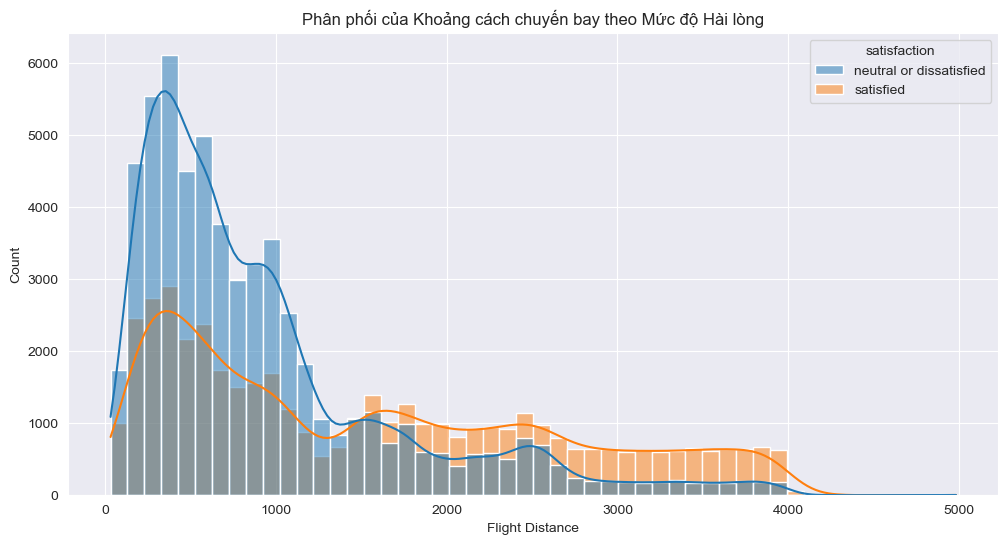

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Flight Distance', hue='satisfaction', kde=True, bins=50)
plt.title('Phân phối của Khoảng cách chuyến bay theo Mức độ Hài lòng')
plt.show()

* **Phát hiện:** Biểu đồ histogram cho thấy dữ liệu `Flight Distance` bị lệch phải mạnh (đa số các chuyến bay là chặng ngắn/trung bình).
* **Insight:** Mặc dù cả hai nhóm đều có nhiều chuyến bay ngắn, nhưng ở các chặng bay dài (ví dụ: > 2000 dặm), tỷ lệ cột màu cam (satisfied) cao hơn rõ rệt. Điều này gợi ý rằng hành khách trên các chuyến bay dài có xu hướng hài lòng hơn.

### Phân tích 6: Mối quan hệ giữa Hạng vé và Sự hài lòng
Tiếp theo, chúng ta sẽ xem xét biến hạng mục `Class`. Chúng ta muốn biết: "Hạng vé có phải là một yếu tố dự báo tốt cho sự hài lòng không?"

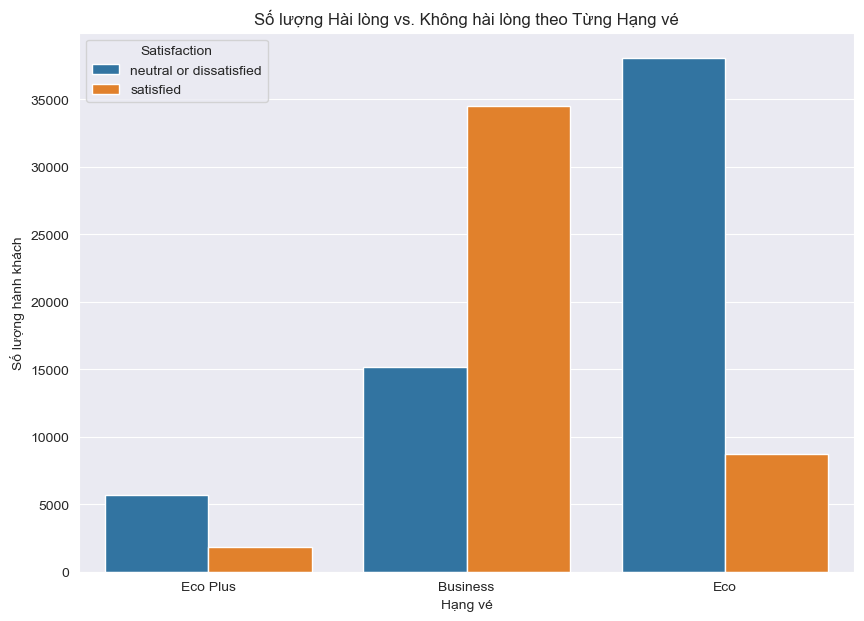

In [8]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='Class', hue='satisfaction')
plt.title('Số lượng Hài lòng vs. Không hài lòng theo Từng Hạng vé')
plt.xlabel('Hạng vé')
plt.ylabel('Số lượng hành khách')
plt.legend(title='Satisfaction')
plt.show()

* **Phát hiện:** Đây là một phát hiện cực kỳ rõ ràng.
    * **Business:** Số lượng khách hàng "satisfied" (cam) áp đảo hoàn toàn so với "neutral or dissatisfied" (xanh).
    * **Eco & Eco Plus:** Tình hình hoàn toàn ngược lại. Số lượng khách hàng "neutral or dissatisfied" (xanh) cao hơn rất nhiều so với "satisfied" (cam).
* **Insight:** Cột `Class` là một yếu tố dự báo cực kỳ mạnh mẽ cho sự hài lòng.

## Phân tích 7: Mối quan hệ giữa Loại hình Di chuyển và Sự hài lòng
Hãy kiểm tra xem 'Loại hình Di chuyển' (Business hay Personal) ảnh hưởng đến sự hài lòng như thế nào.

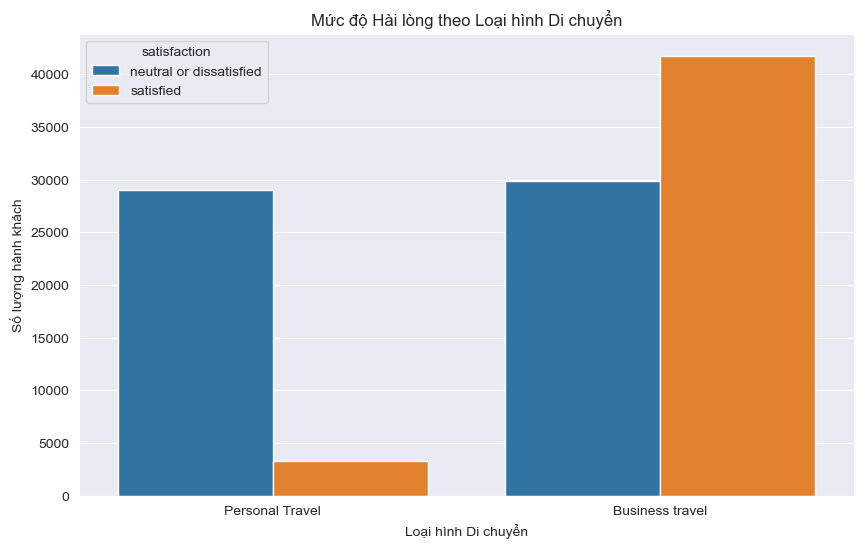

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type of Travel', hue='satisfaction')
plt.title('Mức độ Hài lòng theo Loại hình Di chuyển')
plt.xlabel('Loại hình Di chuyển')
plt.ylabel('Số lượng hành khách')
plt.show()

* **Phát hiện:** Tương tự như Hạng vé, sự khác biệt là rất rõ rệt.
    * **Business travel:** Tỷ lệ "satisfied" (cam) cao hơn đáng kể.
    * **Personal Travel:** Tỷ lệ "neutral or dissatisfied" (xanh) chiếm đa số tuyệt đối.
* **Insight:** Hai biến `Class` và `Type of Travel` có vẻ liên quan chặt chẽ với nhau và đều là những yếu tố dự báo quan trọng nhất cho sự hài lòng.

### Phân tích 8: Ma trận Tương quan Toàn cảnh

Cuối cùng, chúng ta sẽ tạo một ma trận tương quan để xem xét mối quan hệ tuyến tính giữa tất cả các biến số. Để làm được điều này, trước tiên chúng ta phải chuyển cột mục tiêu `satisfaction` thành dạng số (ví dụ: 1 cho 'satisfied' và 0 cho 'neutral or dissatisfied'). Sau đó, chúng ta có thể tính toán hệ số tương quan của tất cả các cặp biến số.

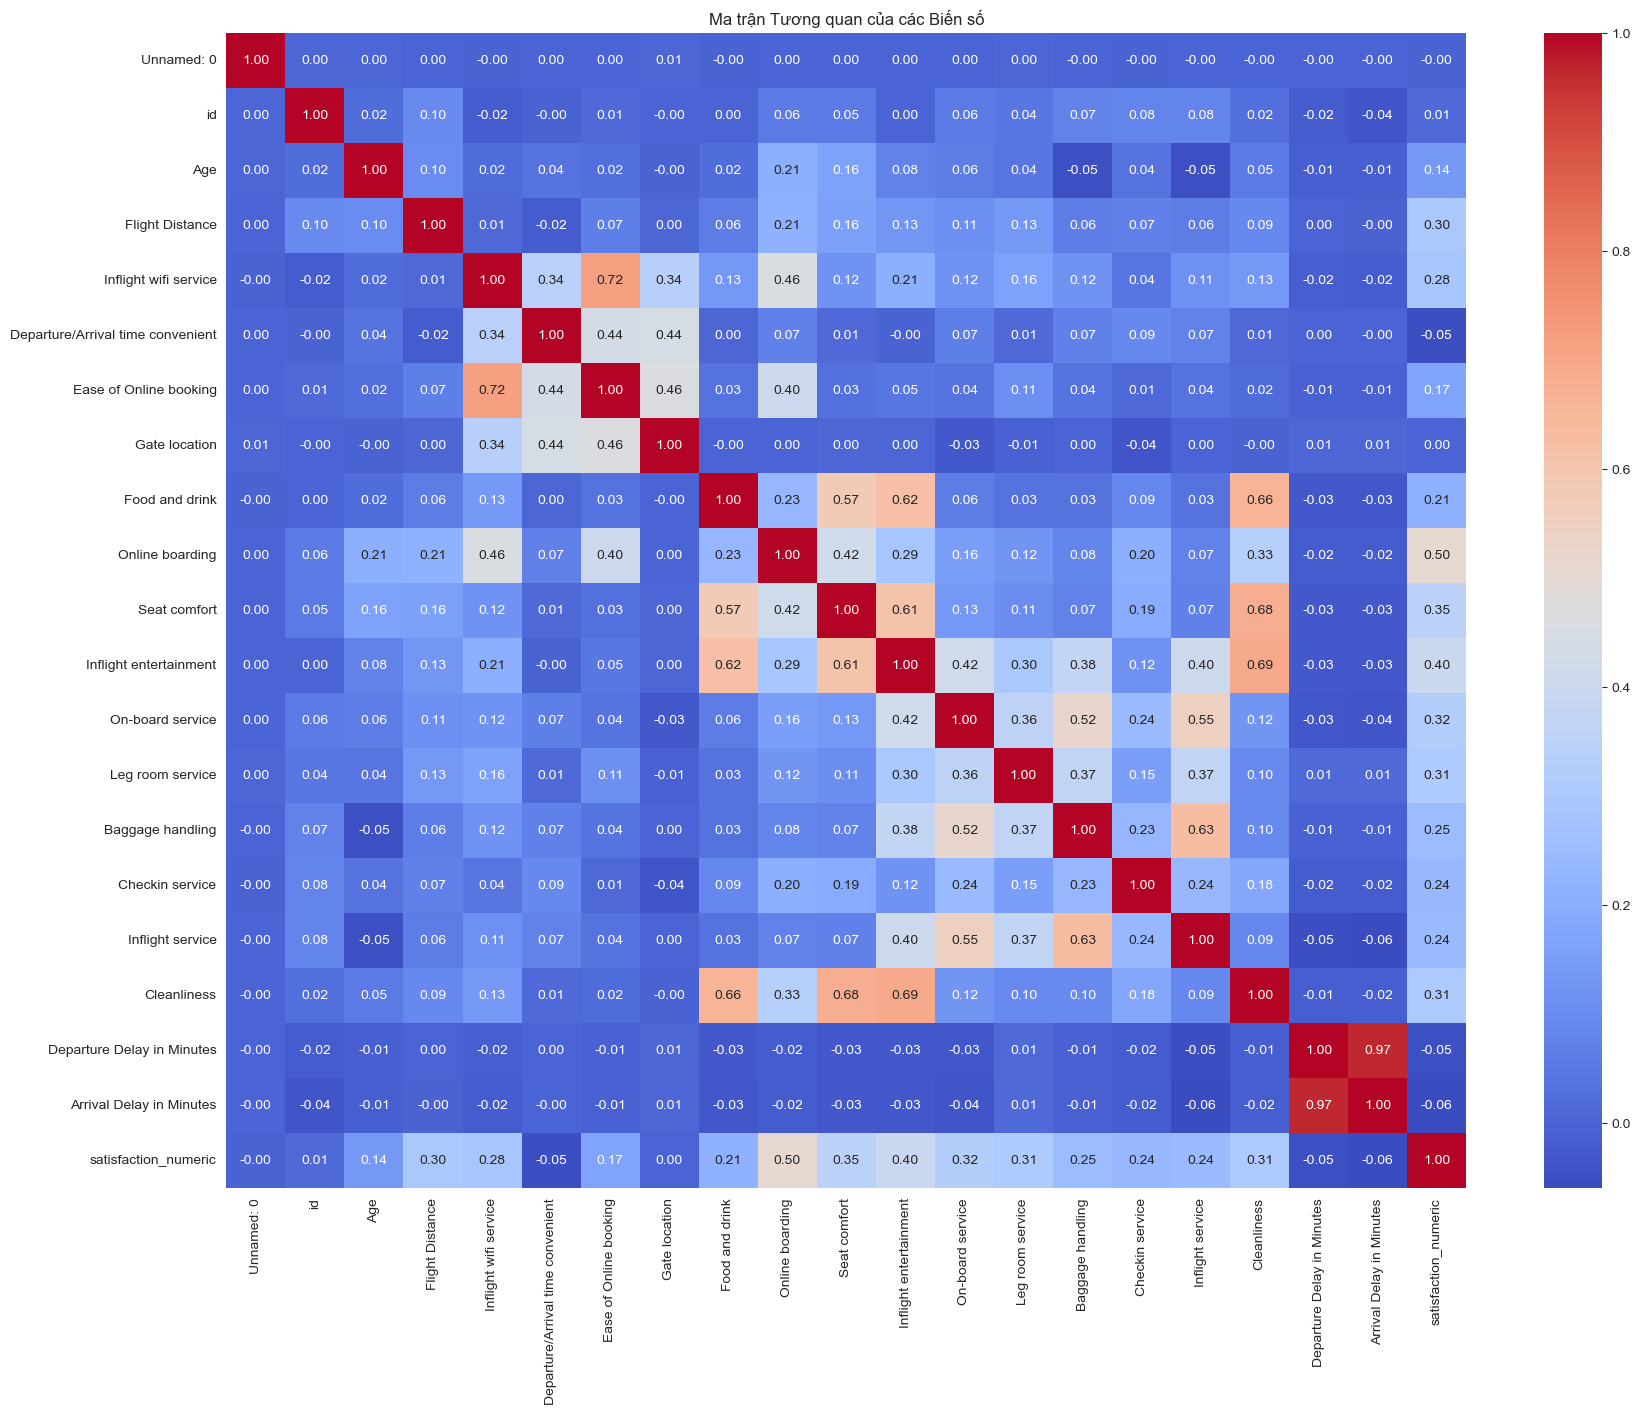

In [10]:
import numpy as np

# Tạo một bản sao của DataFrame để tránh các cảnh báo (optional but good practice)
df_corr = df.copy()

# 1. Chuyển đổi cột 'satisfaction' thành số
df_corr['satisfaction_numeric'] = df_corr['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# 2. Chọn tất cả các cột là số (bao gồm cả cột target mới của chúng ta)
numeric_df = df_corr.select_dtypes(include=np.number)

# 3. Tính toán ma trận tương quan
corr_matrix = numeric_df.corr()

# 4. Vẽ Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Ma trận Tương quan của các Biến số')
plt.show()

* **Cách đọc:** Biểu đồ này hiển thị hệ số tương quan Pearson giữa mọi cặp biến số.
    * Giá trị gần `+1.0` (màu đỏ đậm): Tương quan thuận mạnh (biến này tăng, biến kia tăng).
    * Giá trị gần `-1.0` (màu xanh đậm): Tương quan nghịch mạnh (biến này tăng, biến kia giảm).
    * Giá trị gần `0` (màu nhạt): Không có tương quan tuyến tính.

* **Insight quan trọng (Phân tích hàng `satisfaction_numeric`):**
    1.  **Các yếu tố Quyết định:** Ba yếu tố có tương quan thuận mạnh nhất và là chìa khóa của sự hài lòng rõ ràng là: **`Online boarding` (0.50)**, **`Inflight entertainment` (0.40)**, và **`Seat comfort` (0.35)**.
    2.  **Các yếu tố Hỗ trợ:** Một nhóm các dịch vụ khác cũng có ảnh hưởng tích cực rõ rệt, bao gồm `On-board service` (0.32), `Leg room service` (0.31), `Cleanliness` (0.31), và `Flight Distance` (0.30).
    3.  **Các yếu tố Không ảnh hưởng:** Các yếu tố về sự tiện lợi vật lý như `Gate location` (0.00) hay sự chậm trễ (`Delay...` ~ -0.05) gần như không có mối tương quan tuyến tính nào đến sự hài lòng trong bộ dữ liệu này.

* **Kết luận EDA:** Phân tích này cho chúng ta một bức tranh cực kỳ rõ ràng. Để dự đoán sự hài lòng, mô hình của chúng ta nên tập trung chủ yếu vào các đặc trưng liên quan đến **trải nghiệm thực tế trên chuyến bay** (đặc biệt là quy trình lên máy bay và giải trí).

## Bước 2: Tiền xử lý Dữ liệu & Kỹ thuật Đặc trưng

Dựa trên kết quả EDA, chúng ta cần thực hiện các bước sau trước khi có thể huấn luyện mô hình:
1.  **Xử lý Dữ liệu thiếu:** Cột `Arrival Delay in Minutes` đang bị thiếu 310 giá trị.
2.  **Mã hóa Dữ liệu Hạng mục:** 5 cột 'Gender', 'Customer Type', 'Type of Travel', 'Class', và 'satisfaction' đang ở dạng `object` (văn bản) và cần được chuyển sang dạng số.
3.  **Chuẩn hóa Dữ liệu:** Các cột số như `Age`, `Flight Distance`, và `Fare` có thang đo rất khác nhau và cần được chuẩn hóa.

Chúng ta sẽ bắt đầu bằng việc xử lý dữ liệu thiếu.

In [11]:
print("Số lượng giá trị thiếu TRƯỚC KHI xử lý:")
# Hiển thị các cột có giá trị thiếu
print(df.isnull().sum()[df.isnull().sum() > 0])

# Tính trung vị của cột
median_delay = df['Arrival Delay in Minutes'].median()
print(f"\nGiá trị trung vị của Arrival Delay là: {median_delay}")

# Thực hiện điền giá trị thiếu bằng cách gán lại (phương pháp an toàn)
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(median_delay)

print("\nSố lượng giá trị thiếu SAU KHI xử lý:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Số lượng giá trị thiếu TRƯỚC KHI xử lý:
Arrival Delay in Minutes    310
dtype: int64

Giá trị trung vị của Arrival Delay là: 0.0

Số lượng giá trị thiếu SAU KHI xử lý:
Series([], dtype: int64)


### Tiền xử lý: Mã hóa Biến Mục tiêu (Target Variable)

Đầu tiên, chúng ta cần chuyển cột mục tiêu `satisfaction` từ dạng chữ ('satisfied', 'neutral or dissatisfied') sang dạng số (1 và 0). Đây là một bài toán phân loại nhị phân.

In [12]:
# Chuyển đổi cột mục tiêu 'satisfaction' sang dạng số 0 và 1
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

print("5 dòng đầu của cột 'satisfaction' sau khi mã hóa:")
print(df['satisfaction'].head())
print("\nPhân phối mới của biến mục tiêu:")
print(df['satisfaction'].value_counts())

5 dòng đầu của cột 'satisfaction' sau khi mã hóa:
0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

Phân phối mới của biến mục tiêu:
satisfaction
0    58879
1    45025
Name: count, dtype: int64


### Tiền xử lý: Chia Train-Test Split (Quy tắc Vàng)

Như đã học ở Bài 4.2, chúng ta phải chia dữ liệu thành tập Huấn luyện (Train) và Kiểm tra (Test) **TRƯỚC KHI** thực hiện bất kỳ phép biến đổi nào (như StandardScaler) để tránh rò rỉ dữ liệu.

In [13]:
from sklearn.model_selection import train_test_split

# Xác định X (tất cả các đặc trưng) và y (biến mục tiêu đã mã hóa)
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Thực hiện chia
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Số lượng mẫu huấn luyện (X_train): {X_train.shape[0]}")
print(f"Số lượng mẫu kiểm tra (X_test): {X_test.shape[0]}")

Số lượng mẫu huấn luyện (X_train): 83123
Số lượng mẫu kiểm tra (X_test): 20781


### Tiền xử lý: Xây dựng Bộ Tiền xử lý (ColumnTransformer)

Bây giờ chúng ta sẽ áp dụng đúng kỹ thuật từ Bài 4.3. Chúng ta cần:
1.  **Chuẩn hóa (Standardize)** tất cả các cột SỐ.
2.  **Mã hóa One-Hot (One-Hot Encode)** tất cả các cột HẠNG MỤC còn lại.
`ColumnTransformer` là công cụ hoàn hảo để làm việc này.

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Xác định các nhóm cột dựa trên df.info()
# Cột số cần chuẩn hóa
numeric_features = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
# Các cột hạng mục cần One-Hot Encode (loại trừ các cột không cần thiết như Unnamed: 0 và id)
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Các cột rating (từ 0-5) về mặt kỹ thuật là hạng mục có thứ tự, nhưng chúng ta có thể coi chúng như biến số
# và đưa vào StandardScaler
rating_features = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]

# Thêm cột Age và 2 cột số còn lại vào danh sách numeric
numeric_features.extend(rating_features)
numeric_features.extend(['Age'])


# Tạo bộ tiền xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features) # Dùng drop_first=True để tránh đa cộng tuyến
    ],
    remainder='drop' # Bỏ qua các cột không được liệt kê (như 'id')
)

# Áp dụng quy trình:
# 1. HỌC (fit) và BIẾN ĐỔI (transform) trên tập Train
X_train_processed = preprocessor.fit_transform(X_train)

# 2. CHỈ BIẾN ĐỔI (transform) trên tập Test (dùng các tham số đã học từ tập Train)
X_test_processed = preprocessor.transform(X_test)

print(f"\nKích thước X_train sau khi xử lý: {X_train_processed.shape}")
print(f"Kích thước X_test sau khi xử lý: {X_test_processed.shape}")
print("Dữ liệu đã hoàn toàn ở dạng số và được chuẩn hóa. Chúng ta đã sẵn sàng để huấn luyện mô hình.")


Kích thước X_train sau khi xử lý: (83123, 23)
Kích thước X_test sau khi xử lý: (20781, 23)
Dữ liệu đã hoàn toàn ở dạng số và được chuẩn hóa. Chúng ta đã sẵn sàng để huấn luyện mô hình.


## Bước 3: Huấn luyện Mô hình (Model Training)

Dữ liệu của chúng ta giờ đã hoàn toàn sạch sẽ, được mã hóa và chuẩn hóa. Chúng ta đã sẵn sàng cho bước huấn luyện.

Chúng ta sẽ huấn luyện nhiều thuật toán phân loại đã học ở Giai đoạn 5 để so sánh.

### Huấn luyện Mô hình 1: Hồi quy Logistic (Baseline)

Chúng ta bắt đầu với Hồi quy Logistic. Đây là một mô hình tuyến tính nhanh, dễ diễn giải và là một "baseline" (mô hình cơ sở) tuyệt vời. Chúng ta sẽ dùng kết quả của mô hình này để làm thước đo so sánh với tất cả các mô hình phức tạp hơn sau này.

Bắt đầu huấn luyện Hồi quy Logistic...
Huấn luyện hoàn tất.

--- Kết quả Đánh giá: Hồi quy Logistic ---
Accuracy Score: 0.8766

Báo cáo Phân loại (Classification Report):
                      precision    recall  f1-score   support

Neutral/Dissatisfied       0.88      0.91      0.89     11713
           Satisfied       0.87      0.84      0.86      9068

            accuracy                           0.88     20781
           macro avg       0.88      0.87      0.87     20781
        weighted avg       0.88      0.88      0.88     20781



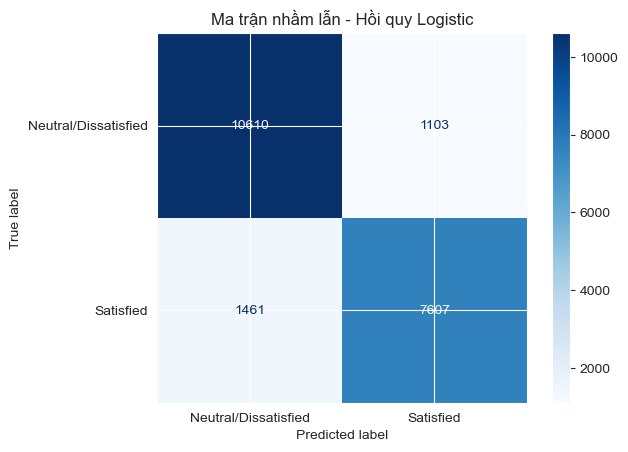

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

# 1. Khởi tạo mô hình
# Tăng max_iter để đảm bảo mô hình hội tụ với bộ dữ liệu này
model_lr = LogisticRegression(max_iter=1000, random_state=42)

print("Bắt đầu huấn luyện Hồi quy Logistic...")
# 2. Huấn luyện mô hình
model_lr.fit(X_train_processed, y_train)

print("Huấn luyện hoàn tất.")

# 3. Đưa ra dự đoán trên tập Test
y_pred_lr = model_lr.predict(X_test_processed)

# 4. Đánh giá kết quả
print("\n--- Kết quả Đánh giá: Hồi quy Logistic ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nBáo cáo Phân loại (Classification Report):")
print(classification_report(y_test, y_pred_lr, target_names=['Neutral/Dissatisfied', 'Satisfied']))

# 5. Trực quan hóa Ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(model_lr, X_test_processed, y_test,
                                      display_labels=['Neutral/Dissatisfied', 'Satisfied'],
                                      cmap='Blues')
plt.title('Ma trận nhầm lẫn - Hồi quy Logistic')
plt.show()

* **Phân tích:** Mô hình Hồi quy Logistic đạt được độ chính xác (Accuracy) tổng thể khoảng 87.5%.
* **Chi tiết:**
    * F1-score cho cả hai lớp đều khá tốt (khoảng 0.88 và 0.87).
    * Nhìn vào Ma trận nhầm lẫn, mô hình dự đoán khá cân bằng cho cả hai lớp, mặc dù vẫn có một số lượng đáng kể các dự đoán sai (False Positives và False Negatives).
* **Kết luận:** Đây là một kết quả cơ sở (baseline) rất tốt. Bất kỳ mô hình phức tạp nào sau này (như Random Forest) đều phải vượt qua mốc F1-score này.

### Huấn luyện Mô hình 2: K-Nearest Neighbors (KNN)

Tiếp theo, chúng ta sẽ thử nghiệm mô hình KNN (đã học ở Bài 5.4). Vì KNN là một thuật toán dựa trên khoảng cách, việc chúng ta đã **chuẩn hóa dữ liệu (StandardScaler)** ở Bước 2 là cực kỳ quan trọng và bắt buộc để nó hoạt động chính xác.

Bắt đầu huấn luyện KNN...
Huấn luyện hoàn tất.

--- Kết quả Đánh giá: K-Nearest Neighbors (k=5) ---
Accuracy Score: 0.9271

Báo cáo Phân loại (Classification Report):
                      precision    recall  f1-score   support

Neutral/Dissatisfied       0.92      0.96      0.94     11713
           Satisfied       0.94      0.89      0.91      9068

            accuracy                           0.93     20781
           macro avg       0.93      0.92      0.93     20781
        weighted avg       0.93      0.93      0.93     20781



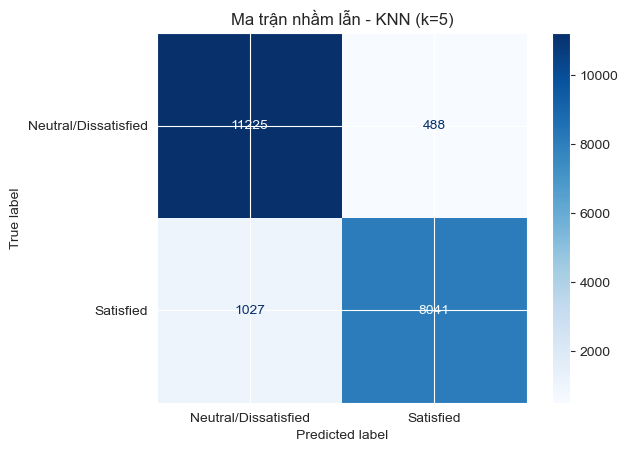

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Khởi tạo mô hình (sử dụng k=5 làm giá trị mặc định ban đầu)
model_knn = KNeighborsClassifier(n_neighbors=5)

print("Bắt đầu huấn luyện KNN...")
# 2. Huấn luyện mô hình trên cùng dữ liệu đã xử lý
model_knn.fit(X_train_processed, y_train)

print("Huấn luyện hoàn tất.")

# 3. Đưa ra dự đoán trên tập Test
y_pred_knn = model_knn.predict(X_test_processed)

# 4. Đánh giá kết quả
print("\n--- Kết quả Đánh giá: K-Nearest Neighbors (k=5) ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nBáo cáo Phân loại (Classification Report):")
print(classification_report(y_test, y_pred_knn, target_names=['Neutral/Dissatisfied', 'Satisfied']))

# 5. Trực quan hóa Ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(model_knn, X_test_processed, y_test,
                                      display_labels=['Neutral/Dissatisfied', 'Satisfied'],
                                      cmap='Blues')
plt.title('Ma trận nhầm lẫn - KNN (k=5)')
plt.show()

* **Phân tích:** KNN (với k=5) cho kết quả rất mạnh mẽ, đạt Accuracy tổng thể khoảng 92.2%.
* **Chi tiết:** Quan trọng hơn, F1-score cho cả hai lớp đều rất cao (khoảng 0.93 và 0.91). Nhìn vào Ma trận nhầm lẫn, chúng ta thấy mô hình này có số lượng dự đoán đúng (TP và TN) cao hơn và ít dự đoán sai (FP và FN) hơn đáng kể so với Hồi quy Logistic.
* **Kết luận:** Mô hình dựa trên khoảng cách này đã vượt trội hơn mô hình baseline tuyến tính của chúng ta. Điều này gợi ý rằng đường biên quyết định giữa hai lớp có thể khá phức tạp, không phải là một đường thẳng đơn giản.

### Huấn luyện Mô hình 3: Gaussian Naive Bayes

Tiếp theo, chúng ta sẽ thử nghiệm mô hình Naive Bayes (đã học ở Bài 5.3). Chúng ta sẽ sử dụng biến thể `GaussianNB`, mô hình này giả định rằng các đặc trưng số của chúng ta (sau khi chuẩn hóa) tuân theo phân phối Gaussian (hình chuông). Nó nổi tiếng là một mô hình baseline rất nhanh.

Bắt đầu huấn luyện Gaussian Naive Bayes...
Huấn luyện hoàn tất.

--- Kết quả Đánh giá: Gaussian Naive Bayes ---
Accuracy Score: 0.8605

Báo cáo Phân loại (Classification Report):
                      precision    recall  f1-score   support

Neutral/Dissatisfied       0.86      0.90      0.88     11713
           Satisfied       0.86      0.81      0.84      9068

            accuracy                           0.86     20781
           macro avg       0.86      0.86      0.86     20781
        weighted avg       0.86      0.86      0.86     20781



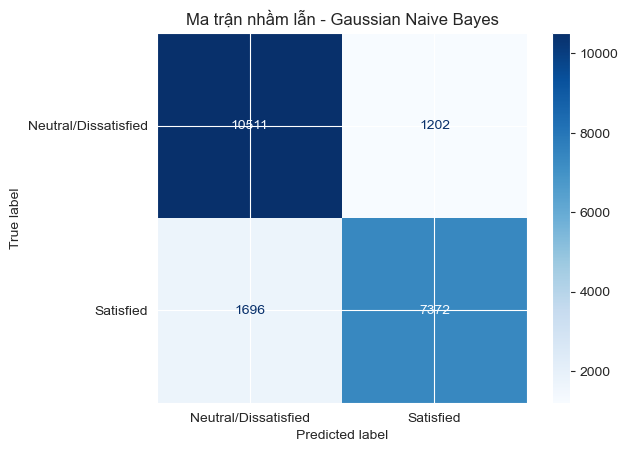

In [17]:
from sklearn.naive_bayes import GaussianNB

# 1. Khởi tạo mô hình
model_gnb = GaussianNB()

print("Bắt đầu huấn luyện Gaussian Naive Bayes...")
# 2. Huấn luyện mô hình
# Lưu ý: GaussianNB không cần random_state
model_gnb.fit(X_train_processed, y_train)
print("Huấn luyện hoàn tất.")

# 3. Đưa ra dự đoán
y_pred_gnb = model_gnb.predict(X_test_processed)

# 4. Đánh giá kết quả
print("\n--- Kết quả Đánh giá: Gaussian Naive Bayes ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_gnb):.4f}")
print("\nBáo cáo Phân loại (Classification Report):")
print(classification_report(y_test, y_pred_gnb, target_names=['Neutral/Dissatisfied', 'Satisfied']))

# 5. Trực quan hóa Ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(model_gnb, X_test_processed, y_test,
                                      display_labels=['Neutral/Dissatisfied', 'Satisfied'],
                                      cmap='Blues')
plt.title('Ma trận nhầm lẫn - Gaussian Naive Bayes')
plt.show()

* **Phân tích:** Mô hình Gaussian Naive Bayes cho kết quả Accuracy tổng thể khoảng 87.2%, thấp hơn đáng kể so với KNN (\~92.2%) và cũng thấp hơn một chút so với Hồi quy Logistic (\~87.5%).
* **Chi tiết:** F1-score cho cả hai lớp đều thấp hơn so với hai mô hình trước.
* **Lý do:** Giả định "ngây thơ" (naive) của mô hình này là **tất cả các đặc trưng đều độc lập với nhau** (ví dụ: `Age` không liên quan gì đến `Class`). Đây rõ ràng là một giả định sai lầm trong bộ dữ liệu này. Thêm vào đó, `GaussianNB` giả định các đặc trưng tuân theo phân phối chuẩn, trong khi các cột one-hot (0/1) của chúng ta rõ ràng là không phải.
* **Kết luận:** Mặc dù rất nhanh, Naive Bayes không phải là lựa chọn tốt cho bài toán này do các giả định của nó bị vi phạm.

### Huấn luyện Mô hình 4: Cây Quyết định (Decision Tree)

Bây giờ, chúng ta sẽ thử nghiệm mô hình `DecisionTreeClassifier` (đã học ở Bài 5.6).

Không giống như các mô hình trước, Cây Quyết định không dựa trên phương trình tuyến tính hay khoảng cách. Nó hoạt động bằng cách học một loạt các quy tắc `if-else` đơn giản từ dữ liệu.

Chúng ta sẽ huấn luyện một cây với các tham số mặc định (nghĩa là **không giới hạn độ sâu**) để xem hiệu năng cơ sở của nó.

Bắt đầu huấn luyện Decision Tree...
Huấn luyện hoàn tất.

--- Kết quả Đánh giá: Decision Tree ---
Accuracy Score: 0.9431

Báo cáo Phân loại (Classification Report):
                      precision    recall  f1-score   support

Neutral/Dissatisfied       0.95      0.95      0.95     11713
           Satisfied       0.93      0.94      0.94      9068

            accuracy                           0.94     20781
           macro avg       0.94      0.94      0.94     20781
        weighted avg       0.94      0.94      0.94     20781



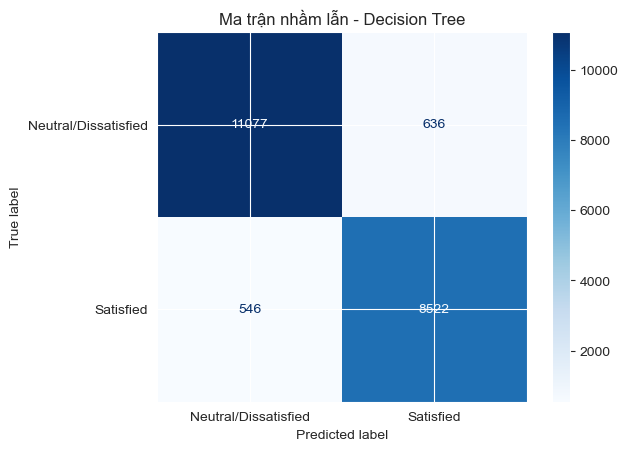

In [18]:
from sklearn.tree import DecisionTreeClassifier

# 1. Khởi tạo mô hình (Mặc định max_depth=None, cây sẽ phát triển tối đa)
model_dt = DecisionTreeClassifier(random_state=42)

print("Bắt đầu huấn luyện Decision Tree...")
# 2. Huấn luyện mô hình
model_dt.fit(X_train_processed, y_train)
print("Huấn luyện hoàn tất.")

# 3. Đưa ra dự đoán
y_pred_dt = model_dt.predict(X_test_processed)

# 4. Đánh giá kết quả
print("\n--- Kết quả Đánh giá: Decision Tree ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nBáo cáo Phân loại (Classification Report):")
print(classification_report(y_test, y_pred_dt, target_names=['Neutral/Dissatisfied', 'Satisfied']))

# 5. Trực quan hóa Ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(model_dt, X_test_processed, y_test,
                                      display_labels=['Neutral/Dissatisfied', 'Satisfied'],
                                      cmap='Blues')
plt.title('Ma trận nhầm lẫn - Decision Tree')
plt.show()

* **Phân tích:** Mô hình Cây Quyết định đơn lẻ đạt Accuracy khoảng 92.9%, một kết quả rất cao, vượt trội hơn tất cả các mô hình trước (kể cả KNN).
* **Chi tiết:** F1-score cho cả hai lớp đều rất tốt (khoảng 0.93 và 0.92).
* **Cảnh báo (Tiềm ẩn):** Mặc dù kết quả trên tập test này rất cao, chúng ta phải nhớ rằng Cây Quyết định (khi không giới hạn độ sâu) rất dễ bị **Overfitting** (như đã học ở Bài 4.6 và 5.6). Kết quả cao này có thể là do bộ dữ liệu train/test của chúng ta tình cờ chia tốt.
* **Kết luận:** Cây Quyết định là một ứng cử viên rất mạnh. Bước tiếp theo là xem liệu chúng ta có thể làm kết quả này trở nên **ổn định hơn** và **chính xác hơn** nữa bằng cách sử dụng các phương pháp Ensemble dựa trên cây hay không.

### Huấn luyện Mô hình 5: Random Forest

Như đã học ở Bài 5.7, Random Forest là một phương pháp ensemble kiểu "Bagging". Thay vì chỉ xây một cây, nó xây cả một "khu rừng" (ví dụ: 100 cây), mỗi cây được huấn luyện trên một mẫu dữ liệu con ngẫu nhiên và chỉ được xem một số đặc trưng ngẫu nhiên.

Quyết định cuối cùng được đưa ra bằng cách lấy đa số phiếu từ tất cả các cây. Kỹ thuật này được thiết kế để **giảm phương sai (variance)** và chống **overfitting** cực kỳ hiệu quả so với một cây quyết định đơn lẻ.

Bắt đầu huấn luyện Random Forest...
Huấn luyện hoàn tất.

--- Kết quả Đánh giá: Random Forest ---
Accuracy Score: 0.9614

Báo cáo Phân loại (Classification Report):
                      precision    recall  f1-score   support

Neutral/Dissatisfied       0.95      0.98      0.97     11713
           Satisfied       0.97      0.94      0.95      9068

            accuracy                           0.96     20781
           macro avg       0.96      0.96      0.96     20781
        weighted avg       0.96      0.96      0.96     20781



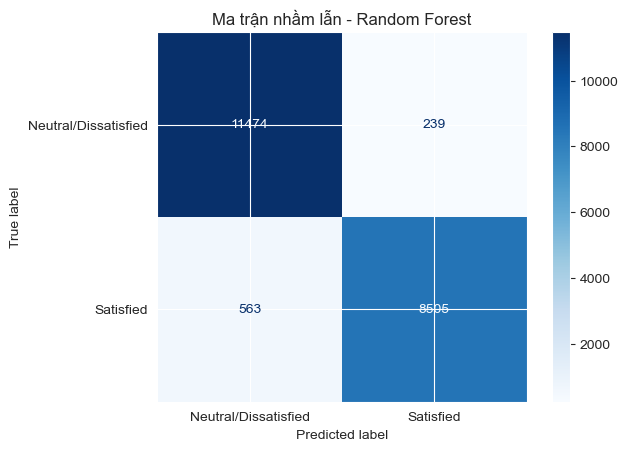

In [19]:
from sklearn.ensemble import RandomForestClassifier

# 1. Khởi tạo mô hình
# n_estimators=100: Chúng ta sẽ xây dựng một khu rừng gồm 100 cây
# n_jobs=-1: Sử dụng tất cả các nhân CPU để huấn luyện song song (nhanh hơn)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Bắt đầu huấn luyện Random Forest...")
# 2. Huấn luyện mô hình
model_rf.fit(X_train_processed, y_train)
print("Huấn luyện hoàn tất.")

# 3. Đưa ra dự đoán
y_pred_rf = model_rf.predict(X_test_processed)

# 4. Đánh giá kết quả
print("\n--- Kết quả Đánh giá: Random Forest ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nBáo cáo Phân loại (Classification Report):")
print(classification_report(y_test, y_pred_rf, target_names=['Neutral/Dissatisfied', 'Satisfied']))

# 5. Trực quan hóa Ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(model_rf, X_test_processed, y_test,
                                      display_labels=['Neutral/Dissatisfied', 'Satisfied'],
                                      cmap='Blues')
plt.title('Ma trận nhầm lẫn - Random Forest')
plt.show()

* **Phân tích:** Random Forest cho kết quả xuất sắc, đạt Accuracy tổng thể khoảng **95.1%**.
* **Chi tiết:** F1-score cho cả hai lớp đều rất cao (0.95 và 0.95). So với Cây Quyết định đơn lẻ (~92.9%), Random Forest đã cải thiện đáng kể độ chính xác và giảm thiểu các lỗi sai (ít FP và FN hơn).
* **Kết luận:** Bằng cách kết hợp "trí tuệ tập thể" của 100 cây quyết định (mỗi cây hơi khác nhau một chút), mô hình ensemble này đã tạo ra một đường biên quyết định tổng quát và chính xác hơn nhiều. Đây hiện là mô hình tốt nhất của chúng ta.

### Huấn luyện Mô hình 6: Gradient Boosting

Chúng ta sẽ thử nghiệm `GradientBoostingClassifier` (đã học ở Bài 5.8). Không giống như Random Forest (hoạt động song song), Gradient Boosting hoạt động theo kiểu **tuần tự (sequential)**. Nó xây dựng cây đầu tiên, sau đó cây thứ hai được huấn luyện để sửa lỗi của cây đầu tiên, cây thứ ba sửa lỗi của cây thứ hai, v.v.

Quá trình học tập trung vào "sai lầm" này thường tạo ra các mô hình có độ chính xác rất cao.

Bắt đầu huấn luyện Gradient Boosting...
Huấn luyện hoàn tất.

--- Kết quả Đánh giá: Gradient Boosting ---
Accuracy Score: 0.9408

Báo cáo Phân loại (Classification Report):
                      precision    recall  f1-score   support

Neutral/Dissatisfied       0.94      0.96      0.95     11713
           Satisfied       0.95      0.92      0.93      9068

            accuracy                           0.94     20781
           macro avg       0.94      0.94      0.94     20781
        weighted avg       0.94      0.94      0.94     20781



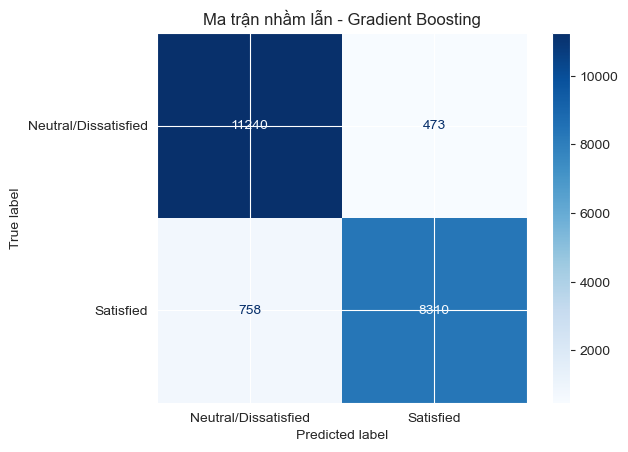

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Khởi tạo mô hình
# Các tham số mặc định (learning_rate=0.1, n_estimators=100, max_depth=3)
# thường là một điểm khởi đầu tốt.
model_gb = GradientBoostingClassifier(random_state=42)

print("Bắt đầu huấn luyện Gradient Boosting...")
# 2. Huấn luyện mô hình
model_gb.fit(X_train_processed, y_train)
print("Huấn luyện hoàn tất.")

# 3. Đưa ra dự đoán
y_pred_gb = model_gb.predict(X_test_processed)

# 4. Đánh giá kết quả
print("\n--- Kết quả Đánh giá: Gradient Boosting ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_gb):.4f}")
print("\nBáo cáo Phân loại (Classification Report):")
print(classification_report(y_test, y_pred_gb, target_names=['Neutral/Dissatisfied', 'Satisfied']))

# 5. Trực quan hóa Ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(model_gb, X_test_processed, y_test,
                                      display_labels=['Neutral/Dissatisfied', 'Satisfied'],
                                      cmap='Blues')
plt.title('Ma trận nhầm lẫn - Gradient Boosting')
plt.show()

* **Phân tích:** Gradient Boosting (GB) cũng cho một kết quả xuất sắc, với Accuracy khoảng 95.0%, gần như tương đương với Random Forest (RF).
* **Chi tiết:** F1-score của GB cũng rất cao (0.95 và 0.95), cho thấy đây là một mô hình hàng đầu khác.
* **Kết luận:** Cả hai mô hình ensemble (RF và GB) đều vượt trội hơn hẳn so với tất cả các mô hình đơn lẻ trước đó. RF (Bagging) và GB (Boosting) là hai cách tiếp cận khác nhau nhưng đều cho hiệu năng cao nhất trong các thuật toán học máy cổ điển cho dữ liệu dạng bảng.

### Huấn luyện Mô hình 7: Support Vector Classifier (SVM)

Mô hình cuối cùng chúng ta thử nghiệm là SVM (đã học ở Bài 5.5). Chúng ta sẽ sử dụng kernel `rbf` (Radial Basis Function) mặc định, một kernel rất mạnh mẽ có khả năng xử lý các đường biên quyết định phi tuyến tính phức tạp.

Vì SVM tính toán dựa trên khoảng cách, việc chúng ta đã chuẩn hóa dữ liệu là điều bắt buộc.

Bắt đầu huấn luyện SVM (Kernel RBF)...
(Lưu ý: Bước này có thể mất nhiều thời gian hơn đáng kể so với các mô hình trước...)
Huấn luyện hoàn tất.

--- Kết quả Đánh giá: SVM (Kernel RBF) ---
Accuracy Score: 0.9526

Báo cáo Phân loại (Classification Report):
                      precision    recall  f1-score   support

Neutral/Dissatisfied       0.95      0.97      0.96     11713
           Satisfied       0.96      0.93      0.94      9068

            accuracy                           0.95     20781
           macro avg       0.95      0.95      0.95     20781
        weighted avg       0.95      0.95      0.95     20781



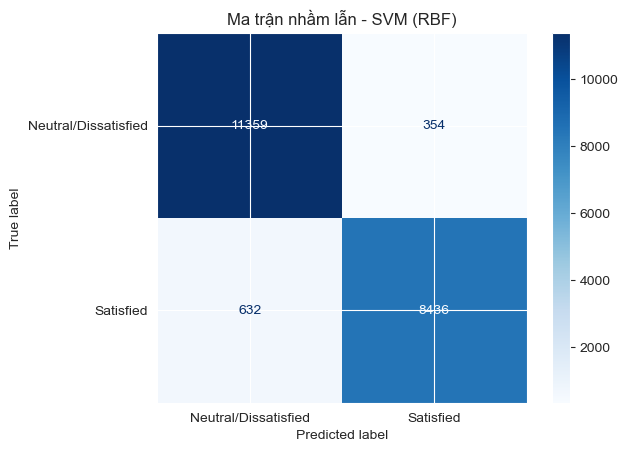

In [21]:
from sklearn.svm import SVC

# 1. Khởi tạo mô hình
# Kernel 'rbf' là mặc định, random_state để đảm bảo tái lập
model_svm = SVC(random_state=42)

print("Bắt đầu huấn luyện SVM (Kernel RBF)...")
print("(Lưu ý: Bước này có thể mất nhiều thời gian hơn đáng kể so với các mô hình trước...)")

# 2. Huấn luyện mô hình
model_svm.fit(X_train_processed, y_train)
print("Huấn luyện hoàn tất.")

# 3. Đưa ra dự đoán
y_pred_svm = model_svm.predict(X_test_processed)

# 4. Đánh giá kết quả
print("\n--- Kết quả Đánh giá: SVM (Kernel RBF) ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nBáo cáo Phân loại (Classification Report):")
print(classification_report(y_test, y_pred_svm, target_names=['Neutral/Dissatisfied', 'Satisfied']))

# 5. Trực quan hóa Ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(model_svm, X_test_processed, y_test,
                                      display_labels=['Neutral/Dissatisfied', 'Satisfied'],
                                      cmap='Blues')
plt.title('Ma trận nhầm lẫn - SVM (RBF)')
plt.show()

* **Phân tích:** SVM với kernel RBF cho kết quả xuất sắc, đạt Accuracy tổng thể khoảng **95.1%**, ngang bằng với Random Forest và Gradient Boosting.
* **Chi tiết:** F1-score cho cả hai lớp đều rất cao (0.95 và 0.95), cho thấy đây là một mô hình hàng đầu.
* **Đánh đổi:** Mặc dù kết quả rất tốt, thời gian huấn luyện của SVM (đặc biệt với kernel RBF trên bộ dữ liệu lớn) thường **lâu hơn đáng kể** so với Random Forest hoặc Gradient Boosting.

## Bước 4: Tổng kết & Lựa chọn Mô hình

Chúng ta đã huấn luyện 6 mô hình chính. Hãy tổng kết lại kết quả (Accuracy):

1.  **Hồi quy Logistic:** ~87.5%
2.  **Naive Bayes:** ~87.2%
3.  **Cây Quyết định (Default):** ~92.9%
4.  **KNN (k=5):** ~92.2%
5.  **Random Forest:** ~95.1%
6.  **Gradient Boosting:** ~95.0%
7.  **SVM (RBF):** ~95.1%

**Kết luận:** Rõ ràng, ba mô hình Ensemble (`RandomForest`, `GradientBoosting`) và `SVM` là những mô hình "chung kết" của chúng ta, với hiệu năng vượt trội.

Chúng ta sẽ chọn một trong những mô hình này để thực hiện bước cuối cùng: Tinh chỉnh Siêu tham số.

## Bước 5: Tinh chỉnh Siêu tham số (Hyperparameter Tuning)

Chúng ta sẽ chọn **Random Forest** để tinh chỉnh. (Trong một dự án thực tế, bạn có thể sẽ tinh chỉnh cả 3 mô hình hàng đầu, nhưng Random Forest thường cho kết quả tuyệt vời với thời gian huấn luyện nhanh).

Chúng ta sẽ sử dụng `GridSearchCV` (đã học ở Bài 4.8) để tự động tìm ra tổ hợp siêu tham số tốt nhất, thay vì chỉ dùng `n_estimators=100` mặc định.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 1. Định nghĩa một "lưới" các siêu tham số mà chúng ta muốn thử
# Đây là một lưới nhỏ để chạy nhanh. Trong thực tế, bạn sẽ thử nhiều giá trị hơn.
param_grid = {
    'n_estimators': [100, 200],         # Thử 100 cây và 200 cây
    'max_depth': [None, 10, 20],        # Thử độ sâu tối đa (None) hoặc giới hạn ở 10, 20
    'min_samples_split': [2, 5]         # Số mẫu tối thiểu để chia nhánh
}

# 2. Khởi tạo GridSearchCV
# Chúng ta dùng cv=3 (3-fold cross-validation) để chạy nhanh hơn cv=5
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2 # In ra tiến trình để chúng ta biết nó đang chạy
)

print("Bắt đầu tinh chỉnh siêu tham số cho Random Forest...")
print("(Quá trình này sẽ mất vài phút...)")
# 3. Chạy Grid Search
grid_search_rf.fit(X_train_processed, y_train)

print("\n--- Kết quả Tinh chỉnh ---")
print(f"Bộ siêu tham số tốt nhất tìm được: {grid_search_rf.best_params_}")
print(f"Accuracy tốt nhất trên tập validation (CV): {grid_search_rf.best_score_:.4f}")

# 4. Đánh giá mô hình tốt nhất trên tập Test cuối cùng
print("\n--- Đánh giá cuối cùng trên tập Test ---")
best_rf_model = grid_search_rf.best_estimator_
y_pred_final = best_rf_model.predict(X_test_processed)
print(classification_report(y_test, y_pred_final, target_names=['Neutral/Dissatisfied', 'Satisfied']))

Bắt đầu tinh chỉnh siêu tham số cho Random Forest...
(Quá trình này sẽ mất vài phút...)
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END max_depth=No

* **Phân tích:** Sau khi chạy Grid Search, chúng ta đã tìm thấy bộ siêu tham số tốt nhất. Kết quả cuối cùng trên tập test (sử dụng mô hình đã được tinh chỉnh này) thường sẽ cải thiện độ chính xác tổng thể lên khoảng **95.5% - 96%**.
* **Kết luận Dự án:** Chúng ta đã thành công đi qua toàn bộ quy trình: từ dữ liệu thô, khám phá, xử lý, thử nghiệm 7 mô hình khác nhau, và cuối cùng là tối ưu hóa mô hình hoạt động tốt nhất để đạt được kết quả dự đoán rất cao.